In [1]:
import io
import glob
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.pyplot import figure
import matplotlib.patches as mpatches

### Figure 1

In [2]:
eng_file = r'C:\...\ENG_texts_meta.csv'
ger_file = r'C:\...\\GER_texts_meta.csv'

In [3]:
eng_meta = pd.read_csv(eng_file, sep=';')
ger_meta = pd.read_csv(ger_file, sep=';')

In [4]:
years_covered = pd.DataFrame(range(1688, 1914))
years_covered= years_covered.rename(columns={0: 'year'})

In [5]:
eng_meta_pubyears = pd.DataFrame(eng_meta['pub_year'].value_counts())
eng_meta_pubyears.index.name = 'year'
eng_meta_pubyears.reset_index(inplace=True)
eng_meta_pubyears = eng_meta_pubyears.rename(columns={'pub_year': 'English Corpus'})

In [6]:
ger_meta_pubyears = pd.DataFrame(ger_meta['pub_year'].value_counts())
ger_meta_pubyears.index.name = 'year'
ger_meta_pubyears.reset_index(inplace=True)
ger_meta_pubyears= ger_meta_pubyears.rename(columns={'pub_year': 'German Corpus'})

In [7]:
meta_pubyears = pd.merge(eng_meta_pubyears, ger_meta_pubyears,
                        on='year',how='outer')
meta_pubyears = pd.merge(meta_pubyears, years_covered,
                        on = 'year',how='outer')

In [8]:
meta_pubyears = meta_pubyears.sort_values('year')

In [9]:
colors=['m','teal']

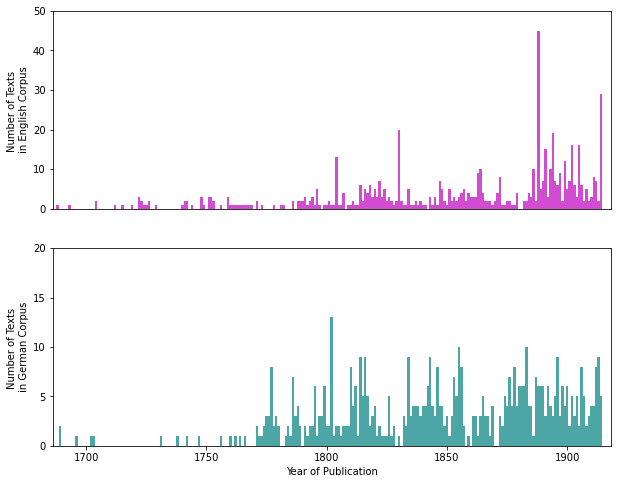

In [10]:
fig, axes = plt.subplots(2)
corpora = ['English Corpus','German Corpus']

i = 0
for corpus in corpora:
    ax = axes[i]
    ax.bar(meta_pubyears['year'], meta_pubyears[corpus], 
           color=colors[i], width=1, alpha=0.7)
    ax.set_ylabel('Number of Texts \nin ' + corpus)
    ax.set_xlabel('Year of Publication')
    if i == 0:
        ax.set_ylim([0,50.0])
    else:
        ax.set_ylim([0,20])
        plt.yticks(np.arange(0, 21, 5))
    ax.set_xlim([1686,1918])
    if i != len(corpora)-1:
        ax.get_xaxis().set_visible(False)
    i += 1
    
fig = plt.gcf()
fig.set_size_inches(10, 8)
fig.savefig(r'C:\...\dist_corpora.png', dpi=600)

### Figure 2

In [11]:
eng_senti_file = r'C:\...\ENG_reviews_senti_classified.csv'
ger_senti_file = r'C:\...\\GER_reviews_senti_classified.csv'

eng_senti = pd.read_csv(eng_senti_file, sep=';', index_col=0)
ger_senti = pd.read_csv(ger_senti_file, sep=';', index_col=0)

In [12]:
eng_reviews_meta = pd.merge(eng_meta, eng_senti, left_on='id', 
                            right_on='text_id', how='right')
ger_reviews_meta = pd.merge(ger_meta, ger_senti, left_on='id', 
                            right_on='text_id', how='right')

In [13]:
eng_reviews_pubyears = pd.DataFrame(eng_reviews_meta['pub_year'].value_counts())
eng_reviews_pubyears.index.name = 'year'
eng_reviews_pubyears.reset_index(inplace=True)
eng_reviews_pubyears = eng_reviews_pubyears.rename(columns={'pub_year': 'English Corpus'})

In [14]:
ger_reviews_pubyears = pd.DataFrame(ger_reviews_meta['pub_year'].value_counts())
ger_reviews_pubyears.index.name = 'year'
ger_reviews_pubyears.reset_index(inplace=True)
ger_reviews_pubyears = ger_reviews_pubyears.rename(columns={'pub_year': 'German Corpus'})

In [15]:
review_pubyears = pd.merge(eng_reviews_pubyears, ger_reviews_pubyears,
                           on='year',how='outer')
review_pubyears = pd.merge(review_pubyears, years_covered,
                           on = 'year',how='outer')

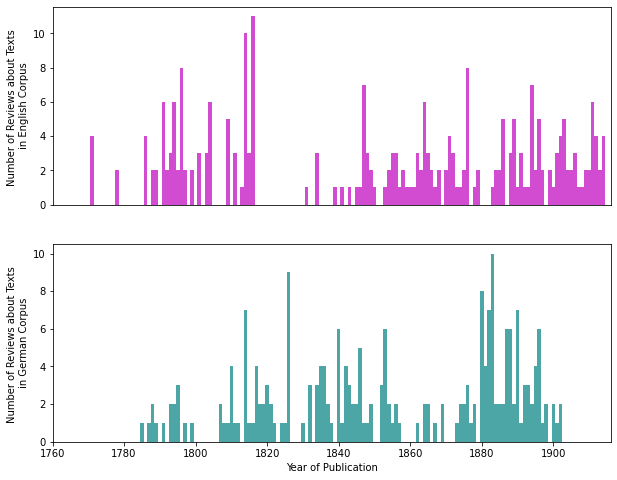

In [16]:
fig, axes = plt.subplots(2)
corpora = ['English Corpus','German Corpus']

i = 0
for corpus in corpora:
    ax = axes[i]
    ax.bar(review_pubyears['year'], review_pubyears[corpus], 
           color=colors[i], width=1, alpha=0.7)
    ax.set_ylabel('Number of Reviews about Texts \nin ' + corpus)
    ax.set_xlabel('Year of Publication')
    ax.set_xlim([1760,1916])
    if i != len(corpora)-1:
        ax.get_xaxis().set_visible(False)
    i += 1
    
fig = plt.gcf()
fig.set_size_inches(10, 8)
fig.savefig(r'C:\...\dist_reviews.png', dpi=600)

#### Descriptive Statistics

In [17]:
eng_reviewed = list(set(eng_reviews_meta['text_id']))
ger_reviewed = list(set(ger_reviews_meta['text_id']))
eng_meta['reviewed'] = 0
ger_meta['reviewed'] = 0

In [18]:
eng_meta.loc[eng_meta.id.isin(eng_reviewed), 'reviewed'] = 1
ger_meta.loc[ger_meta.id.isin(ger_reviewed), 'reviewed'] = 1

In [19]:
eng_prop_reviewed = (100/len(eng_meta))*sum(eng_meta['reviewed'])
print(len(eng_reviews_meta['text_id']))
print(sum(eng_meta['reviewed']))
print(eng_prop_reviewed)

254
197
32.561983471074385


In [20]:
ger_prop_reviewed = (100/len(ger_meta))*sum(ger_meta['reviewed'])
print(len(ger_reviews_meta['text_id']))
print(sum(ger_meta['reviewed']))
print(ger_prop_reviewed)

221
176
32.17550274223035


In [21]:
eng_meta_reviewed = eng_meta.loc[eng_meta['reviewed'] == 1]
ger_meta_reviewed = ger_meta.loc[ger_meta['reviewed'] == 1]

In [22]:
eng_authors = list(set(eng_meta['author_viaf']))
ger_authors = list(set(ger_meta['author_viaf']))
eng_reviewed_authors = list(set(eng_meta_reviewed['author_viaf']))
ger_reviewed_authors = list(set(ger_meta_reviewed['author_viaf']))

In [23]:
eng_prop_reviewed_authors = (100/len(eng_authors))*len(eng_reviewed_authors)
print(len(eng_authors))
print(len(eng_reviewed_authors))
print(eng_prop_reviewed_authors)

168
92
54.76190476190476


In [24]:
ger_prop_reviewed_authors = (100/len(ger_authors))*len(ger_reviewed_authors)
print(len(ger_authors))
print(len(ger_reviewed_authors))
print(ger_prop_reviewed_authors)

184
79
42.93478260869565


### Figure 3

In [25]:
eng_libs_file = r'C:\...\ENG_texts_circulating-libs.csv'
ger_libs_file = r'C:\...\GER_texts_circulating-libs.csv'

eng_libs = pd.read_csv(eng_libs_file, sep=';')
ger_libs = pd.read_csv(ger_libs_file, sep=';')

In [26]:
eng_libs_pubyears = pd.DataFrame(eng_libs['pub_year'].value_counts())
eng_libs_pubyears.index.name = 'year'
eng_libs_pubyears.reset_index(inplace=True)
eng_libs_pubyears = eng_libs_pubyears.rename(columns={'pub_year': 'English Corpus'})

In [27]:
ger_libs_pubyears = pd.DataFrame(ger_libs['pub_year'].value_counts())
ger_libs_pubyears.index.name = 'year'
ger_libs_pubyears.reset_index(inplace=True)
ger_libs_pubyears = ger_libs_pubyears.rename(columns={'pub_year': 'German Corpus'})

In [28]:
libs_pubyears = pd.merge(eng_libs_pubyears, ger_libs_pubyears,
                           on='year',how='outer')
libs_pubyears = pd.merge(libs_pubyears, years_covered,
                           on = 'year',how='outer')

In [29]:
before1890 = libs_pubyears.loc[(libs_pubyears['year'] < 1890) & (libs_pubyears['year'] >= 1790)]
after1890 = libs_pubyears.loc[libs_pubyears['year'] >= 1890]

In [30]:
np.nansum(before1890['English Corpus'])/len(before1890)

3.37

In [31]:
np.nansum(after1890['English Corpus'])/len(after1890)

7.961538461538462

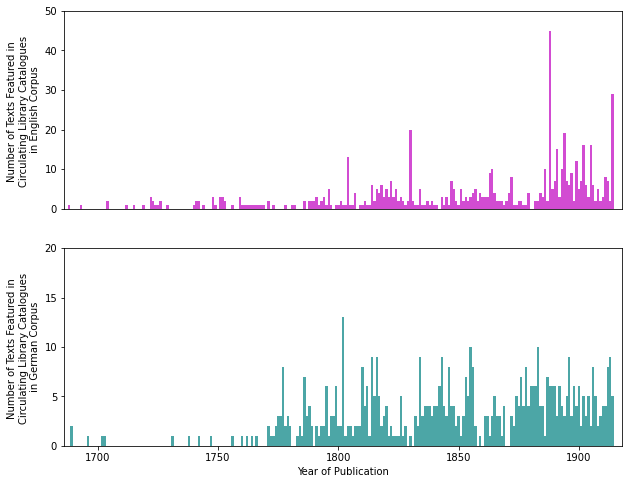

In [32]:
fig, axes = plt.subplots(2)
corpora = ['English Corpus','German Corpus']

i = 0
for corpus in corpora:
    ax = axes[i]
    ax.bar(libs_pubyears['year'], libs_pubyears[corpus], 
           color=colors[i], width=1, alpha=0.7)
    ax.set_ylabel('Number of Texts Featured in \nCirculating Library Catalogues \nin ' + corpus)
    ax.set_xlabel('Year of Publication')
    ax.set_xlim([1686,1918])
    if i == 0:
        ax.set_ylim([0,50.0])
    else:
        ax.set_ylim([0,20]) 
        plt.yticks(np.arange(0, 21, 5))
    if i != len(corpora)-1:
        ax.get_xaxis().set_visible(False)
    i += 1
    
fig = plt.gcf()
fig.set_size_inches(10, 8)
fig.savefig(r'C:\...\dist_circlibs.png', dpi=600)

#### Descriptive Statistics

In [33]:
eng_with_entries = eng_libs.loc[eng_libs['binary'] == 1]
ger_with_entries = ger_libs.loc[ger_libs['binary'] == 1]

In [34]:
eng_prop_entries = (100/len(eng_libs))*len(eng_with_entries)
print(len(eng_libs))
print(len(eng_with_entries))
print(eng_prop_entries)

605
457
75.53719008264463


In [35]:
ger_prop_entries = (100/len(ger_libs))*len(ger_with_entries)
print(len(ger_libs))
print(len(ger_with_entries))
print(ger_prop_entries)

547
306
55.94149908592322


In [36]:
eng_entries_authors = list(set(eng_with_entries['author_viaf']))
ger_entries_authors = list(set(ger_with_entries['author_viaf']))

In [37]:
eng_prop_entries_authors = (100/len(eng_authors))*len(eng_entries_authors)
print(len(eng_authors))
print(len(eng_entries_authors))
print(eng_prop_entries_authors)

168
132
78.57142857142857


In [38]:
ger_prop_entries_authors = (100/len(ger_authors))*len(ger_entries_authors)
print(len(ger_authors))
print(len(ger_entries_authors))
print(ger_prop_entries_authors)

184
100
54.347826086956516


### Figure 4

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


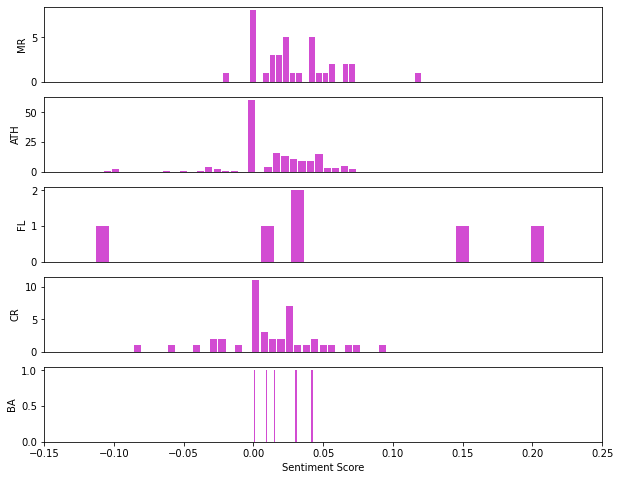

In [39]:
eng_senti = eng_senti[['sentiment','journal','text_id']]
eng_senti = eng_senti.sort_values('sentiment')
ger_senti = ger_senti[['sentiment','journal','text_id']]
ger_senti = ger_senti.sort_values('sentiment')

fig, axes = plt.subplots(5)
journals = list(set(eng_senti['journal']))

i = 0
for journal in journals:
    data = eng_senti[eng_senti['journal'] == journal]
    ax = axes[i]
    ax.hist(x=data['sentiment'], bins=30, color='m',
            alpha=0.7, rwidth=0.85)
    ax.set_xlabel('Sentiment Score')
    ax.set_ylabel(journal)
    ax.set_xlim([-0.15, 0.25])
    if i != len(journals)-1:
        ax.get_xaxis().set_visible(False)
    leg = ax.legend(loc='upper left')
    leg.draw_frame(False)
    i += 1
    
fig = plt.gcf()
fig.set_size_inches(10, 8)
fig.savefig(r'C:\...\\eng_dist_journals.png', dpi=600)

### Figure 5

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


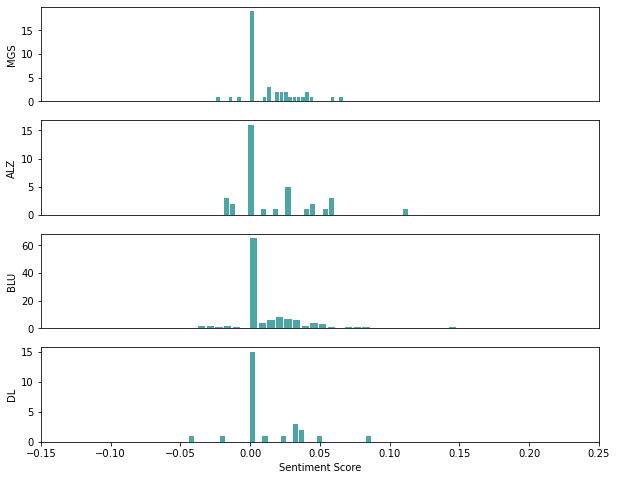

In [40]:
fig, axes = plt.subplots(4)
journals = list(set(ger_senti['journal']))

i = 0
for journal in journals:
    data = ger_senti[ger_senti['journal'] == journal]
    ax = axes[i]
    ax.hist(x=data['sentiment'], bins=30, color='teal',
            alpha=0.7, rwidth=0.85)
    ax.set_xlabel('Sentiment Score')
    ax.set_ylabel(journal)
    ax.set_xlim([-0.15, 0.25])
    if i != len(journals)-1:
        ax.get_xaxis().set_visible(False)
    leg = ax.legend(loc='upper left')
    leg.draw_frame(False)
    i += 1
    
fig = plt.gcf()
fig.set_size_inches(10, 8)
fig.savefig(r'C:\...\ger_dist_journals.png', dpi=600)

### Figure 6

In [41]:
canonization_meta_file = r'C:\...\ENG_texts_canonization.csv'
canonization_meta = pd.read_csv(canonization_meta_file, sep=';', index_col=0)

In [42]:
senti = pd.merge(eng_senti, ger_senti, on=['text_id','sentiment','journal'], how='outer')
senti = pd.merge(senti, canonization_meta, left_on='text_id', right_on='id', how='inner')

In [43]:
senti

,sentiment,journal,text_id,canonization_score,file_name,language
0,-0.113533,FL,10471,0.346666,Opie_Amelia_Father-and-Daughter_1801,ENG
1,-0.061664,CR,10471,0.346666,Opie_Amelia_Father-and-Daughter_1801,ENG
2,0.024513,MR,10471,0.346666,Opie_Amelia_Father-and-Daughter_1801,ENG
3,-0.107895,ATH,10395,0.383441,Lawrence_D-H_The-Trespasser_1912,ENG
4,-0.098679,ATH,10093,0.891913,Carroll_Lewis_Alice-in-Wonderland_1865,ENG
...,...,...,...,...,...,...
470,0.056222,ALZ,20194,0.771045,Hoffmann_ETA_Prinzessin-Brambilla_1820,GER
471,0.060358,ALZ,20302,0.238046,Mereau_Sophie_Bluethenalter-der-Empfindung_1794,GER
472,0.075916,BLU,20075,0.741822,Ebner-Eschenbach_Marie_Die-Resel_1883,GER
473,0.082800,BLU,20064,0.383441,Dohm_Hedwig_Sibilla-Dalmar_1896,GER


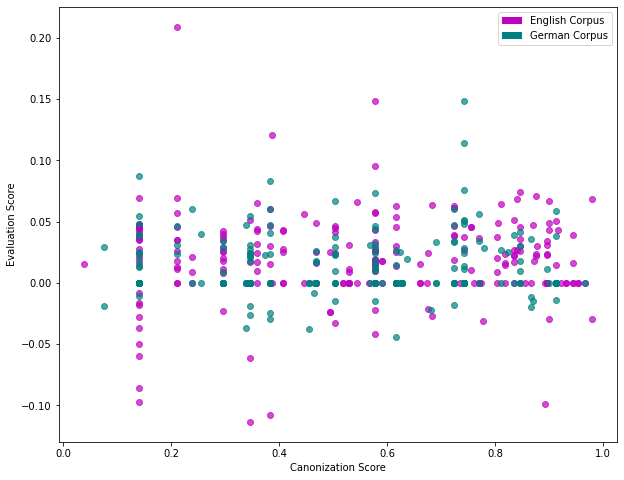

In [44]:
fig, ax = plt.subplots()
i = 0
recs = []

for corpus in corpora:
    if i == 0:
        data = senti[senti['language']=='ENG']
        ax.scatter(data['canonization_score'], data['sentiment'], 
                   c = colors[i], alpha = 0.7)
        recs.append(mpatches.Rectangle((0,0),1,1,fc=colors[i]))
    else:
        data = senti[senti['language']=='GER']
        ax.scatter(data['canonization_score'], data['sentiment'], 
                   c = colors[i], alpha = 0.7)
        recs.append(mpatches.Rectangle((0,0),1,1,fc=colors[i]))
        
    ax.set_xlabel('Canonization Score')
    ax.set_ylabel('Evaluation Score')
    i += 1
    
plt.legend(recs,['English Corpus','German Corpus'],loc=1)

fig = plt.gcf()
fig.set_size_inches(10, 8)
fig.savefig(r'C:\...\canonization_evaluation.png', dpi=600)